<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li></ul></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

**Цель исследования:** Защитить данные клиентов страховой компании «Хоть потоп». Нужно разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, и обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

#### Загрузка и изучение данных

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Проверим признаки на мультиколлинеарность

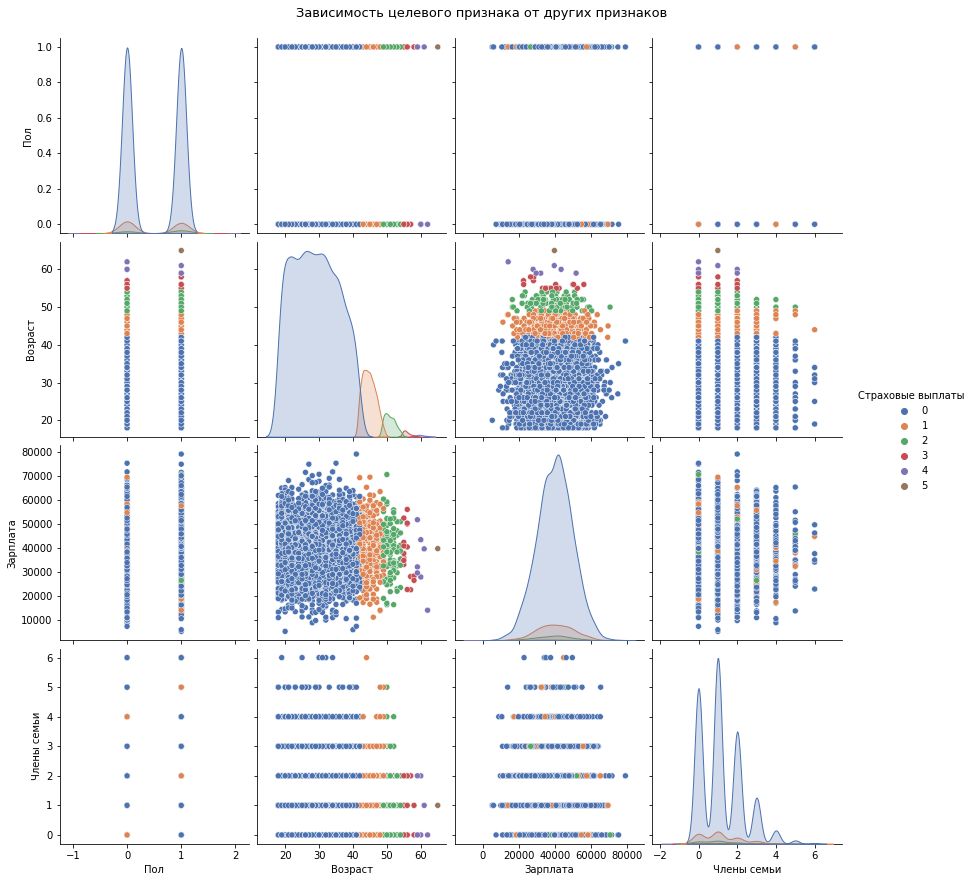

In [6]:
sns.pairplot(df, hue='Страховые выплаты', palette="deep", height=3)
plt.suptitle("Зависимость целевого признака от других признаков", y=1.02, fontsize=13)
plt.show()

Из графиков прослеживается, что страховые выплаты в основном производятся людям старше 40 лет

In [7]:
print('Количество явных дубликатов:', df.duplicated().sum()) 

Количество явных дубликатов: 153


In [8]:
print('Количество пропусков:', df.isna().sum()) 

Количество пропусков: Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


**ВЫВОДЫ:**. 
- Исходный датасет состоит из 5 столбцов (без учета столбца индекса) и 5000 строк (не считая строки с наименованием столбцов).

- Типы данных в столбцах не требуют замены.

- Пропусков в данных нет.

- В данных присутствует 153 явных дубликата, это 3% от общего числа данных. Дубликаты удалим, это не повлияет на исследование.

- Другой предобработки данных не требуется.

In [9]:
# Удалим дубликаты
df = df.drop_duplicates()
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


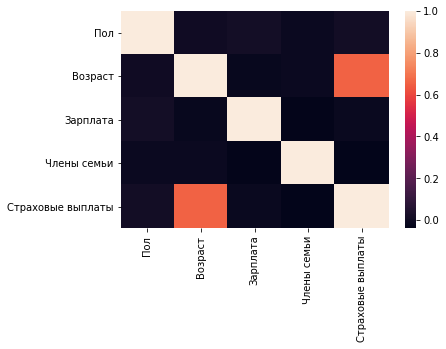

In [10]:
corr = df.corr()
sns.heatmap(corr) 
plt.show()

In [11]:
df['Возраст'].corr(df['Страховые выплаты'])

0.6549641033747968

Наибольшая корреляция в данных между Возрастом и Страховыми выплатами: 0.6510300979467276

## Умножение матриц

**Вопрос:**. 
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**  
Качество линейной регрессии не изменится, изменится только вектор весов линейной регрессии для новых признаков.



**Обоснование:**
Представим новую матрицу признаков X1 как произведение старой X на матрицу P (обратимую):  
$$ 
X1 = X * P
$$  
Тогда формула для расчета весов прмет вид:  
$$
w1 = (X1^T X1)^{-1} X1^T y  
$$
Подставим новое значение X1 в формулу w1:  
$$
w1 = ((XP)^T XP)^{-1} (XP)^T y  =>
$$
$$
w1 = (P^T (X^T X) P)^{-1} (X P)^T y => 
$$
$$
w1 = (P^T (X^T X) P)^{-1} P^T X^T y => 
$$
$$
w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y => 
$$
$$
w1 = P^{-1} ((X^T X)^{-1}) E X^T y  
$$
$$
w1 = P^{-1} w  
$$

То же для формулы предсказаний:  

$$
a1 = X P P^{-1} w
$$
$$
a1 = X w
$$
Таким образом, предсказания не изменятся

## Алгоритм преобразования

**Алгоритм**


- Сгенерировать обратимую квадратную матрицу, соответстующую размерностью количеству столбцов признаков.

- Умножить матрицу исходных признаков на сгенерированную матрицу.

- Посчитать качество модели на полученной матрице и сравнить с качеством модели на матрице исходных данных.

**Обоснование**  

Предсказания модели на измененной и исходной матрице отличаться не должны, следовательно, результаты метрики r2 должны оказаться равными. Тем самым мы докажем, что правильно защитили данные.

Поделим данные на учебную и целевую части и проверим результат

In [12]:
features=df.drop(['Страховые выплаты'],axis=1)
target=df['Страховые выплаты']

In [13]:
features.shape, target.shape

((4847, 4), (4847,))

In [14]:
train_features, test_features, train_target, test_target = train_test_split(features, target, 
                                                                             test_size=0.25, random_state=12345)

In [15]:
print(train_features.shape[0]/features.shape[0])
print()
print(test_target.shape[0]/target.shape[0])

0.7499484217041469

0.2500515782958531


Сгенерируем матрицу размером 4х4 методом random.normal ()

In [16]:
matrix_rand = np.random.normal(size=(4, 4))
display (matrix_rand)

array([[ 0.09544467, -0.38903218, -0.38063123, -0.70147897],
       [-0.42320663,  0.01526455, -1.53513161,  1.97372366],
       [-0.51103907,  0.33416738,  0.40425237, -0.91136531],
       [ 0.46509656,  0.25109762, -1.25682625, -0.17726776]])

Проверим полученную матрицу на обратимость, для этого сделаем обратную матрицу методом linalg.inv().  
Если появится ошибка, то изначально наша сгенерированная матрица не являлась обратимой.

In [17]:
matrix_inv = np.linalg.inv(matrix_rand)
display (matrix_inv)

array([[-0.5320077 , -0.61061505, -1.02517883,  0.5772017 ],
       [-1.48721846, -0.16146277,  0.62967574,  0.85015434],
       [-0.43212759, -0.28060735, -0.19994727, -0.38635307],
       [-0.43867346,  0.15872491, -0.38020498, -0.18331059]])

Создадим матрицу из наших исходных признаков, умножим ее на сгенерированную и обращенную матрицу и составим из полученной новый набор измененных признаков.

In [21]:
matrix = features.values
matrix_new = matrix@matrix_inv
features_changed = pd.DataFrame (matrix_new, columns = features.columns)

In [22]:
features_changed

,Пол,Возраст,Зарплата,Члены семьи
0,-21495.475111,-13925.196480,-9892.973387,-19127.862264
1,-16489.699150,-10670.347905,-7569.411470,-14642.493032
2,-9117.808729,-5897.436794,-4180.632123,-8088.760083
3,-18051.829445,-11704.399810,-8325.338476,-16093.436576
4,-11320.704228,-7328.983437,-5202.018066,-10059.433715
...,...,...,...,...
4842,-15469.474433,-10021.885943,-7121.247112,-13769.367050
4843,-22694.489827,-14709.156208,-10456.208301,-20216.179154
4844,-14679.747024,-9515.501009,-6766.379428,-13080.732752
4845,-14165.139033,-9179.547003,-6526.588733,-12615.014863


## Проверка алгоритма

Создадим класс LinearRegression для последующего обучения наших моделей

In [ ]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T@X)@X.T@y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0


Обучим модель на исходных признаках и выведем на экран метрику качества R2

In [19]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2 = r2_score(target, predictions)
print('r2_score', r2.round(6))

r2_score 0.430201


Обучим модель на измененных признаках и выведем на экран метрику качества R2

In [23]:
model = LinearRegression()
model.fit(features_changed, target)
predictions = model.predict(features_changed)
r2 = r2_score(target, predictions)
print('r2_score', r2.round(6))

r2_score 0.430201


Метрики качества на изначальных и закодированных данных не отличаются.

**ВЫВОД**. 

От нас требовалось защитить данные клиентов страховой компании «Хоть потоп» и разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Преобразование требовалось произвести таким образом, чтобы по результату работы нашего алгоритма, качество моделей машинного обучения не ухудшилось.

В результате нашей работы был разработан алгоритм, где данные были преобразованы методом умножения признаков исходных данных на обратимую матрицу. Результатом такого преобразования стала новая (изменённая) матрица признаков, которая при сравнении качества предсказаний сохранила значение R2 неизменным.

Таким образом, данный алгоритм работает и может использоваться для защиты персональной информации клиентов.